In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import scipy
plt.style.use('ggplot')
pd.set_option('display.max_columns',200)

In [2]:
df = pd.read_csv("laptop_prices.xls")

In [3]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,No,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [4]:
df.shape

(1275, 23)

In [5]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [6]:
df["Resolution"] = df["ScreenW"]*df["ScreenH"] 

In [7]:
df.dtypes

Company                  object
Product                  object
TypeName                 object
Inches                  float64
Ram                       int64
OS                       object
Weight                  float64
Price_euros             float64
Screen                   object
ScreenW                   int64
ScreenH                   int64
Touchscreen              object
IPSpanel                 object
RetinaDisplay            object
CPU_company              object
CPU_freq                float64
CPU_model                object
PrimaryStorage            int64
SecondaryStorage          int64
PrimaryStorageType       object
SecondaryStorageType     object
GPU_company              object
GPU_model                object
Resolution                int64
dtype: object

In [8]:
df.isna().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
Resolution              0
dtype: int64

In [9]:
df.Company.value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

### removing the unnecessary columns

In [10]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model', 'Resolution'],
      dtype='object')

In [11]:
df= df[['Company','TypeName', 'Inches', 'Ram', 'OS',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq',
       'PrimaryStorage','PrimaryStorageType', 'GPU_company','Resolution','SecondaryStorageType','SecondaryStorage']].copy()

In [12]:
df.shape

(1275, 20)

### Checking for duplicates

In [13]:
df.loc[df.duplicated()]

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,GPU_company,Resolution,SecondaryStorageType,SecondaryStorage
1274,Asus,Notebook,15.6,4,Windows 10,369.0,Standard,1366,768,No,No,No,Intel,1.6,500,HDD,Intel,1049088,No,0


In [14]:
df.shape

(1275, 20)

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(1274, 20)

In [17]:
## 1 duplicate present in the data(removed)

### Univariate Analysis

### Categorical data

In [18]:
df.Company.value_counts().values

array([291, 289, 268, 151, 101,  54,  48,  21,   9,   7,   7,   6,   4,
         4,   3,   3,   3,   3,   2])

In [19]:
df.Company.value_counts().index

Index(['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple',
       'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei'],
      dtype='object', name='Company')

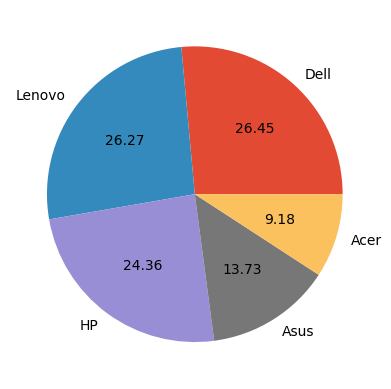

In [20]:
plt.pie(df.Company.value_counts().values[:5],labels=df.Company.value_counts().index[:5],autopct='%.2f')
plt.show()

<Axes: ylabel='count'>

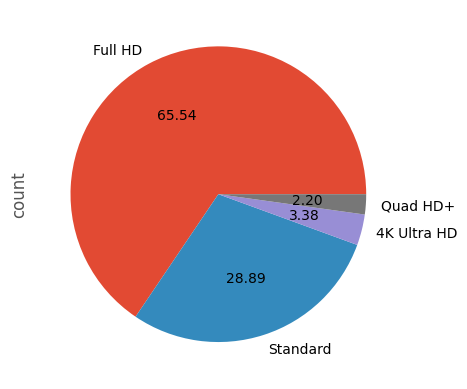

In [21]:
df['Screen'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

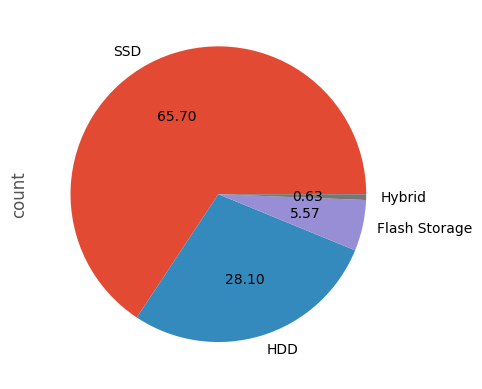

In [22]:
df['PrimaryStorageType'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

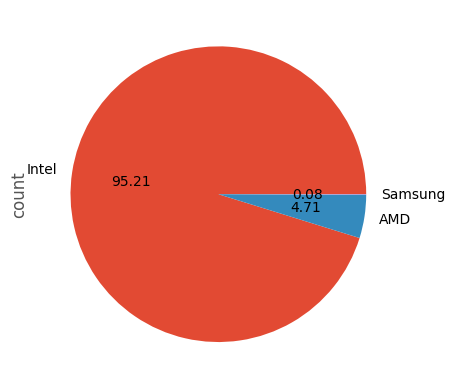

In [23]:
df['CPU_company'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

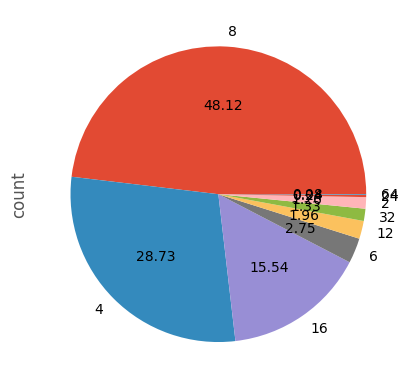

In [24]:
df['Ram'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='count', ylabel='Company'>

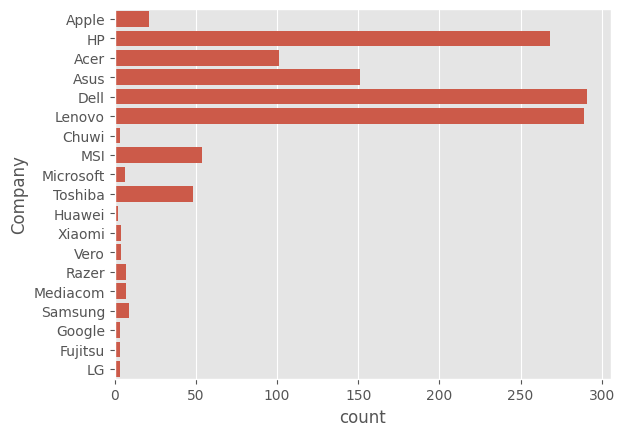

In [25]:
sns.countplot(df['Company'])

<Axes: xlabel='count', ylabel='TypeName'>

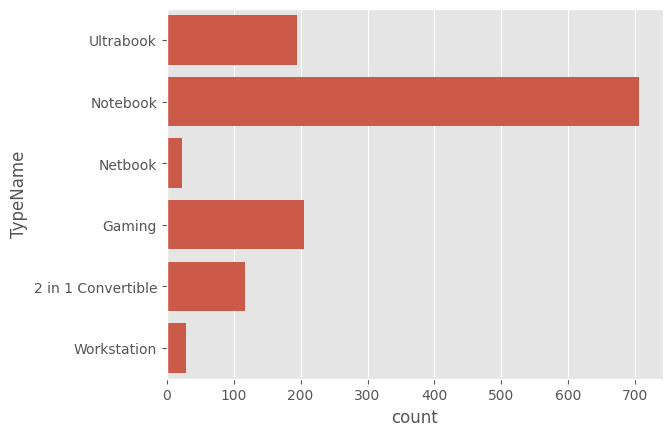

In [26]:
sns.countplot(df['TypeName'])

<Axes: xlabel='count', ylabel='Screen'>

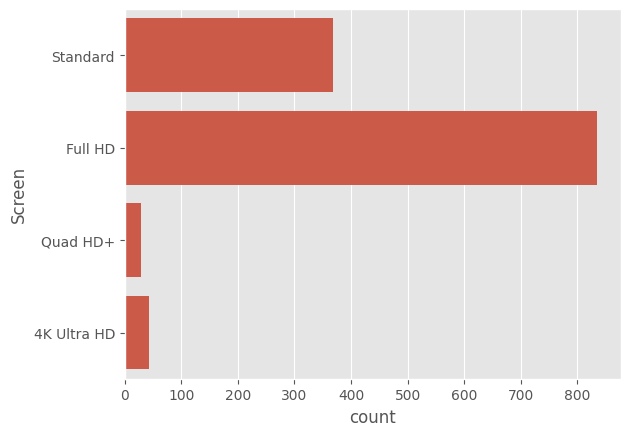

In [27]:
sns.countplot(df['Screen'])

<Axes: xlabel='count', ylabel='PrimaryStorageType'>

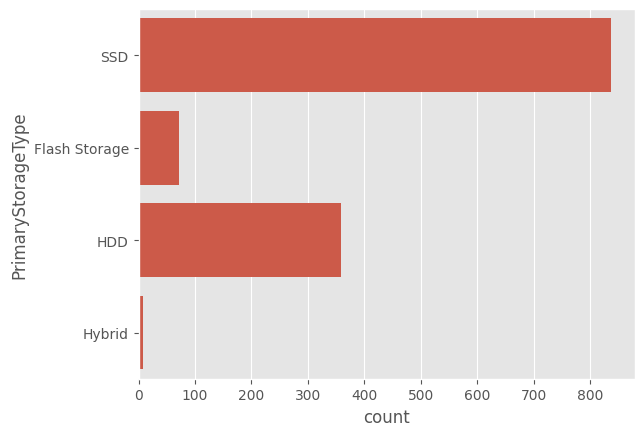

In [28]:
sns.countplot(df['PrimaryStorageType'])

### Numerical values

(array([451., 444., 229.,  98.,  37.,   8.,   3.,   2.,   1.,   1.]),
 array([ 174. ,  766.5, 1359. , 1951.5, 2544. , 3136.5, 3729. , 4321.5,
        4914. , 5506.5, 6099. ]),
 <BarContainer object of 10 artists>)

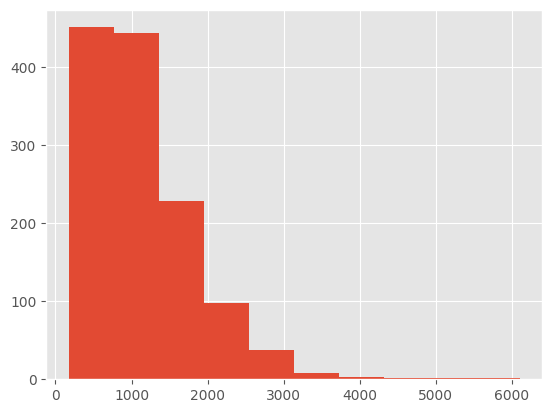

In [29]:
plt.hist(df['Price_euros'])

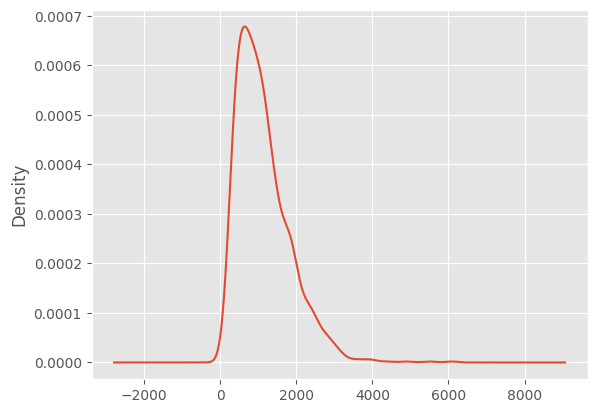

In [30]:
kde_plot = df['Price_euros'].plot(kind='kde')

/var/folders/vx/05bb1btj27b6b13b__xl72580000gn/T/ipykernel_2103/2073861339.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

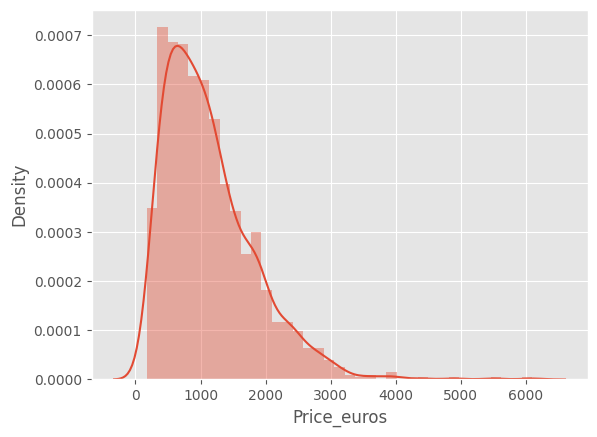

In [31]:
sns.distplot(df['Price_euros'])

<Axes: ylabel='Price_euros'>

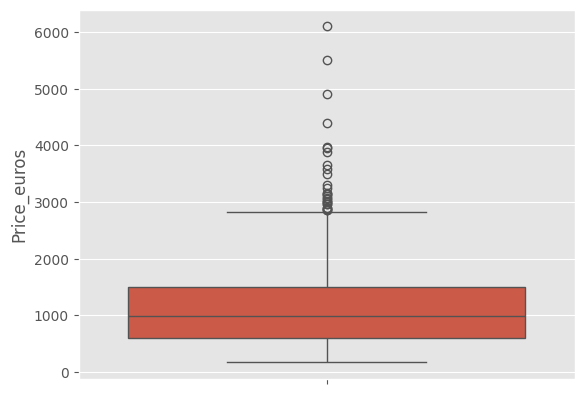

In [32]:
sns.boxplot(df['Price_euros'])

In [33]:
print(df['Price_euros'].skew())

1.511134133367674


/var/folders/vx/05bb1btj27b6b13b__xl72580000gn/T/ipykernel_2103/2943166583.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CPU_freq"])


<Axes: xlabel='CPU_freq', ylabel='Density'>

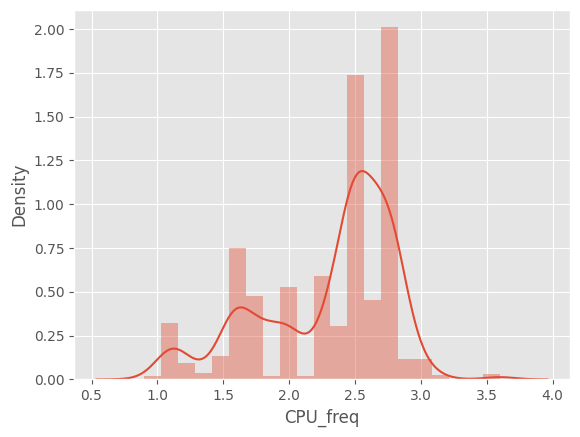

In [34]:
sns.distplot(df["CPU_freq"])

<Axes: ylabel='CPU_freq'>

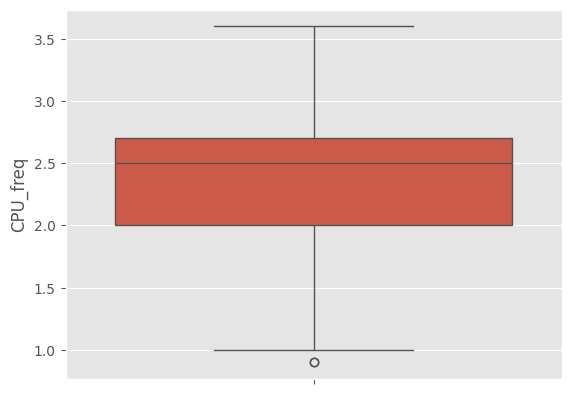

In [35]:
sns.boxplot(df["CPU_freq"])

In [36]:
df["CPU_freq"].skew()

np.float64(-0.8409959640727721)

<Axes: ylabel='Inches'>

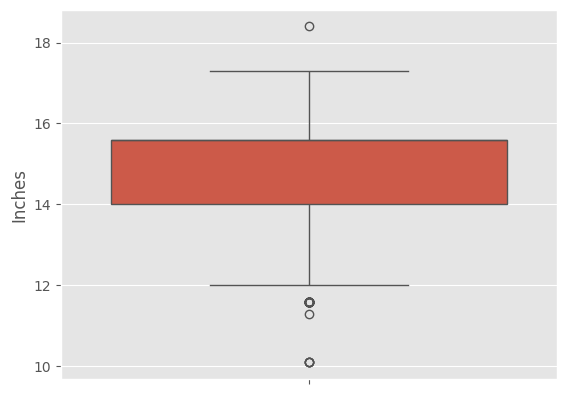

In [37]:
sns.boxplot(df["Inches"])

/var/folders/vx/05bb1btj27b6b13b__xl72580000gn/T/ipykernel_2103/2945259378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Inches"])


<Axes: xlabel='Inches', ylabel='Density'>

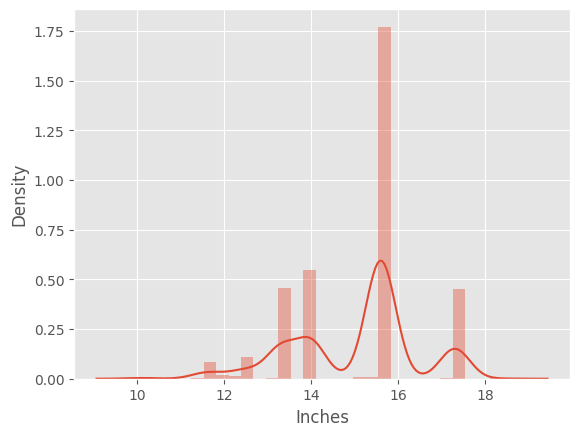

In [38]:
sns.distplot(df["Inches"])

In [39]:
df["Inches"].skew()

np.float64(-0.4376346369996592)

### outliers detection

In [40]:
Q1 = np.quantile(df['Price_euros'],0.25)
Q3 = np.quantile(df['Price_euros'],0.75)
IQR = Q3 - Q1
upper_range = Q3 + IQR
lower_range = Q1 - IQR
outliers_price_euros = list()
for i in df['Price_euros']:
    if (i < lower_range):
        outliers_price_euros.append(i)
    elif (i > upper_range):
        outliers_price_euros.append(i)

In [41]:
Q1 = np.quantile(df['CPU_freq'],0.25)
Q3 = np.quantile(df['CPU_freq'],0.75)
IQR = Q3 - Q1
upper_range = Q3 + IQR
lower_range = Q1 - IQR
outliers_CPU_freq = list()
for i in df['CPU_freq']:
    if (i < lower_range):
        outliers_CPU_freq.append(i)
    elif (i > upper_range):
        outliers_CPU_freq.append(i)

### Bivariate Analysis

### Numerical Numerical data

In [42]:
df.head()

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,GPU_company,Resolution,SecondaryStorageType,SecondaryStorage
0,Apple,Ultrabook,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,SSD,Intel,4096000,No,0
1,Apple,Ultrabook,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,Flash Storage,Intel,1296000,No,0
2,HP,Notebook,15.6,8,No OS,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,256,SSD,Intel,2073600,No,0
3,Apple,Ultrabook,15.4,16,macOS,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,512,SSD,AMD,5184000,No,0
4,Apple,Ultrabook,13.3,8,macOS,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,256,SSD,Intel,4096000,No,0


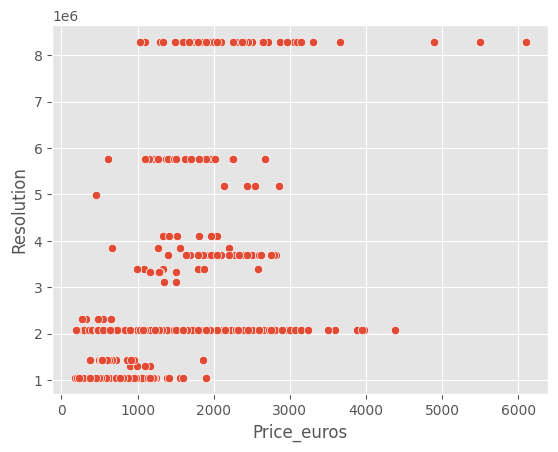

In [43]:
sns.scatterplot(x= "Price_euros",y ="Resolution",data = df)
plt.ylabel('Resolution')
plt.xlabel('Price_euros')
plt.show()

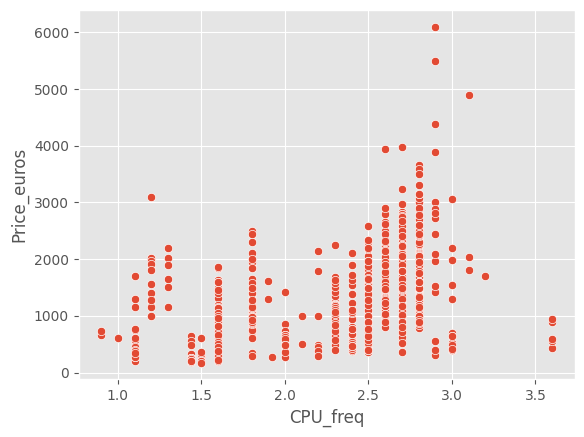

In [44]:
sns.scatterplot(y= "Price_euros",x ="CPU_freq",data = df)
plt.ylabel('Price_euros')
plt.xlabel('CPU_freq')
plt.show()

### Categorical Categorical Data

In [45]:
df.head()

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,GPU_company,Resolution,SecondaryStorageType,SecondaryStorage
0,Apple,Ultrabook,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,SSD,Intel,4096000,No,0
1,Apple,Ultrabook,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,Flash Storage,Intel,1296000,No,0
2,HP,Notebook,15.6,8,No OS,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,256,SSD,Intel,2073600,No,0
3,Apple,Ultrabook,15.4,16,macOS,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,512,SSD,AMD,5184000,No,0
4,Apple,Ultrabook,13.3,8,macOS,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,256,SSD,Intel,4096000,No,0


<Axes: xlabel='Screen', ylabel='count'>

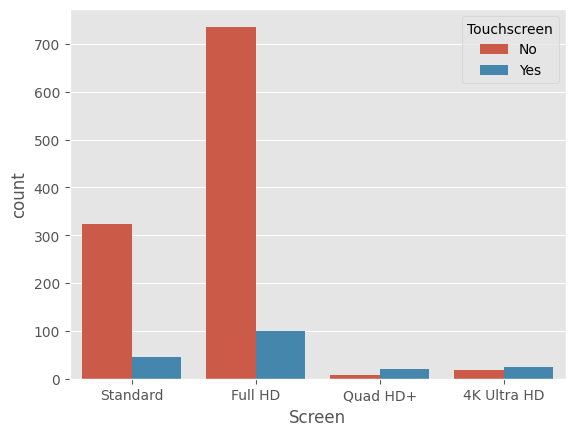

In [46]:
sns.countplot(x="Screen",hue= "Touchscreen",data = df)

<Axes: xlabel='CPU_company', ylabel='count'>

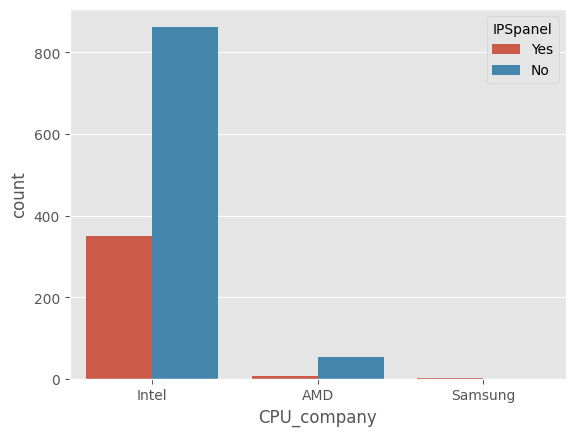

In [47]:
sns.countplot(x="CPU_company",hue= "IPSpanel",data = df)

<Axes: xlabel='CPU_company', ylabel='count'>

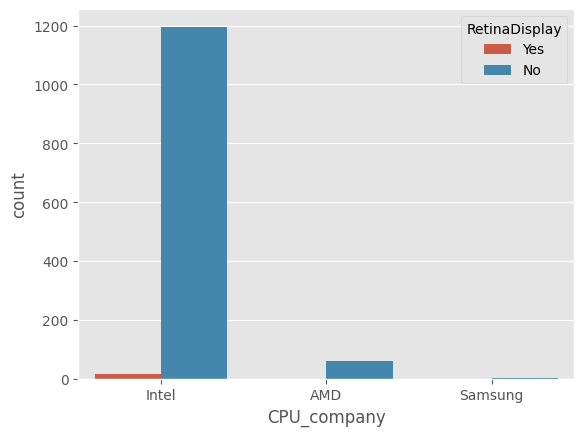

In [48]:
sns.countplot(x="CPU_company",hue= "RetinaDisplay",data = df)

<Axes: ylabel='PrimaryStorage'>

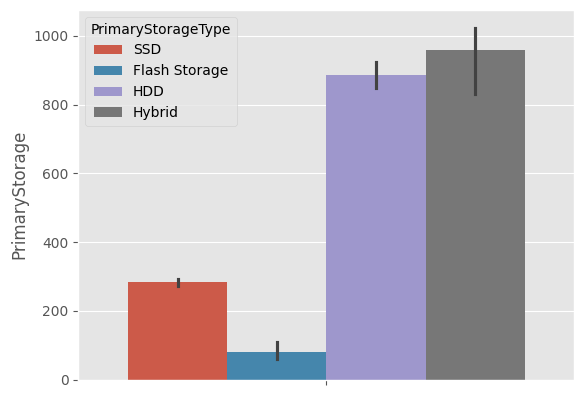

In [49]:
sns.barplot(y = "PrimaryStorage",hue = "PrimaryStorageType",data=df)

### Categorical Numerical Data

In [50]:
df.head()

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,GPU_company,Resolution,SecondaryStorageType,SecondaryStorage
0,Apple,Ultrabook,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,SSD,Intel,4096000,No,0
1,Apple,Ultrabook,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,Flash Storage,Intel,1296000,No,0
2,HP,Notebook,15.6,8,No OS,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,256,SSD,Intel,2073600,No,0
3,Apple,Ultrabook,15.4,16,macOS,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,512,SSD,AMD,5184000,No,0
4,Apple,Ultrabook,13.3,8,macOS,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,256,SSD,Intel,4096000,No,0


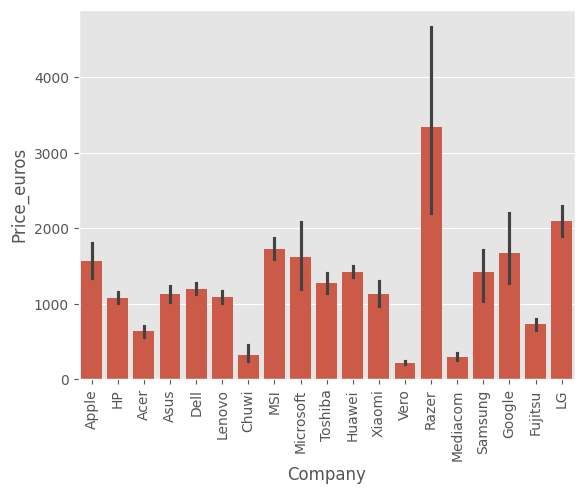

In [51]:
sns.barplot(x="Company",y="Price_euros",data = df)
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Screen', ylabel='Price_euros'>

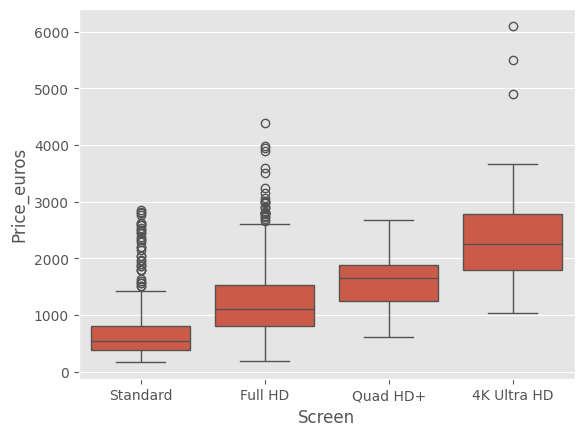

In [52]:
sns.boxplot(y="Price_euros",x="Screen",data=df)

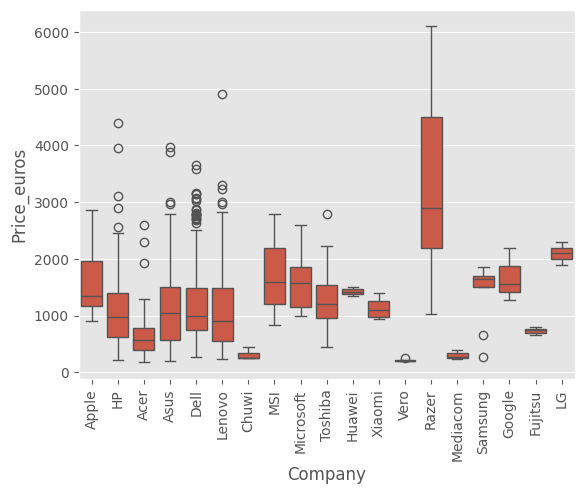

In [53]:
sns.boxplot(y="Price_euros",x="Company",data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='CPU_company', ylabel='Price_euros'>

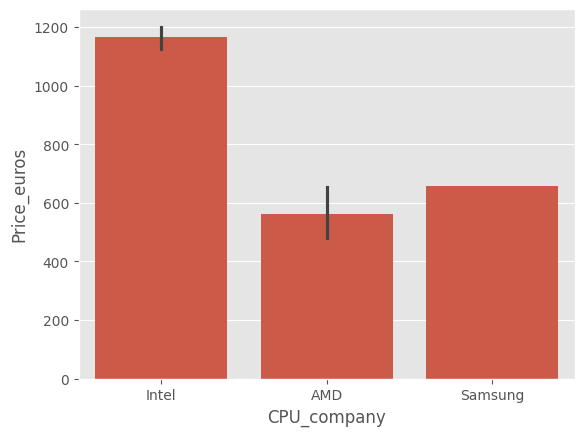

In [54]:
sns.barplot(x="CPU_company",y="Price_euros",data=df)

<Axes: xlabel='Screen', ylabel='Price_euros'>

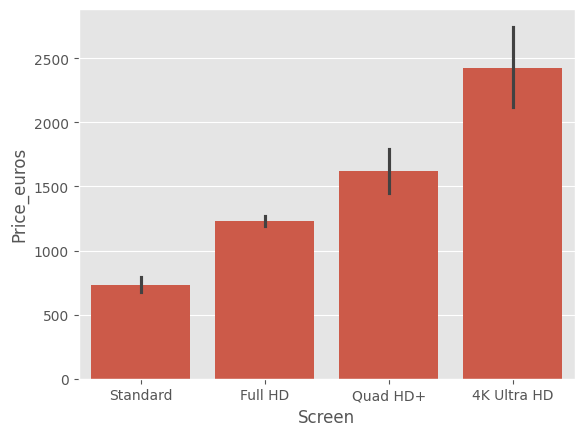

In [55]:
sns.barplot(x="Screen",y="Price_euros",data=df)

<Axes: xlabel='Ram', ylabel='Price_euros'>

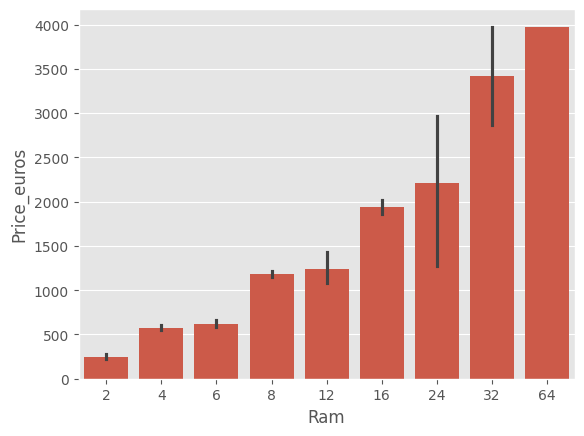

In [56]:
sns.barplot(x="Ram",y="Price_euros",data=df)

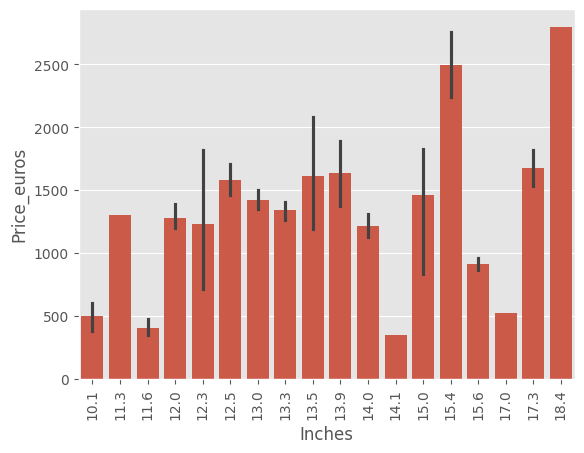

In [57]:
sns.barplot(x="Inches",y="Price_euros",data=df)
plt.xticks(rotation=90)
plt.show()

In [58]:
df.corr(numeric_only=True)['Price_euros'].sort_values(ascending=False)

Price_euros         1.000000
Ram                 0.740106
ScreenW             0.552074
ScreenH             0.548111
Resolution          0.511428
CPU_freq            0.428178
SecondaryStorage    0.291001
Inches              0.066990
PrimaryStorage     -0.124704
Name: Price_euros, dtype: float64

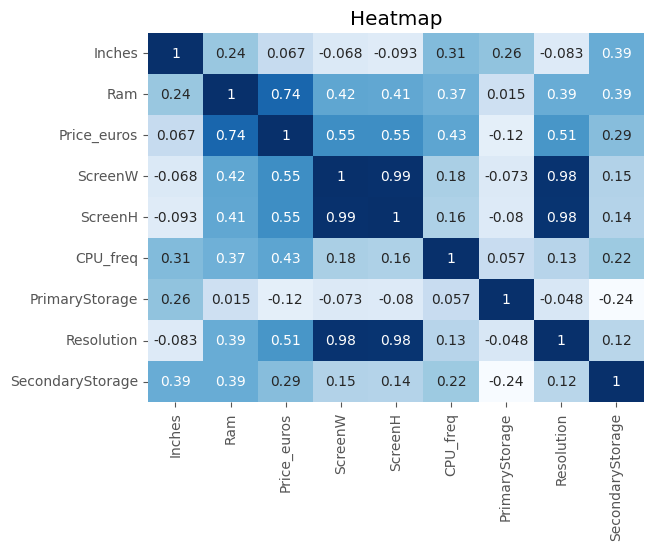

In [59]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cbar=False,cmap='Blues')
plt.title('Heatmap')
plt.show()

### Multivariate Analysis

In [60]:
df.head()

,Company,TypeName,Inches,Ram,OS,Price_euros,Screen,ScreenW,ScreenH,Touchscreen,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,GPU_company,Resolution,SecondaryStorageType,SecondaryStorage
0,Apple,Ultrabook,13.3,8,macOS,1339.69,Standard,2560,1600,No,Yes,Yes,Intel,2.3,128,SSD,Intel,4096000,No,0
1,Apple,Ultrabook,13.3,8,macOS,898.94,Standard,1440,900,No,No,No,Intel,1.8,128,Flash Storage,Intel,1296000,No,0
2,HP,Notebook,15.6,8,No OS,575.00,Full HD,1920,1080,No,No,No,Intel,2.5,256,SSD,Intel,2073600,No,0
3,Apple,Ultrabook,15.4,16,macOS,2537.45,Standard,2880,1800,No,Yes,Yes,Intel,2.7,512,SSD,AMD,5184000,No,0
4,Apple,Ultrabook,13.3,8,macOS,1803.60,Standard,2560,1600,No,Yes,Yes,Intel,3.1,256,SSD,Intel,4096000,No,0


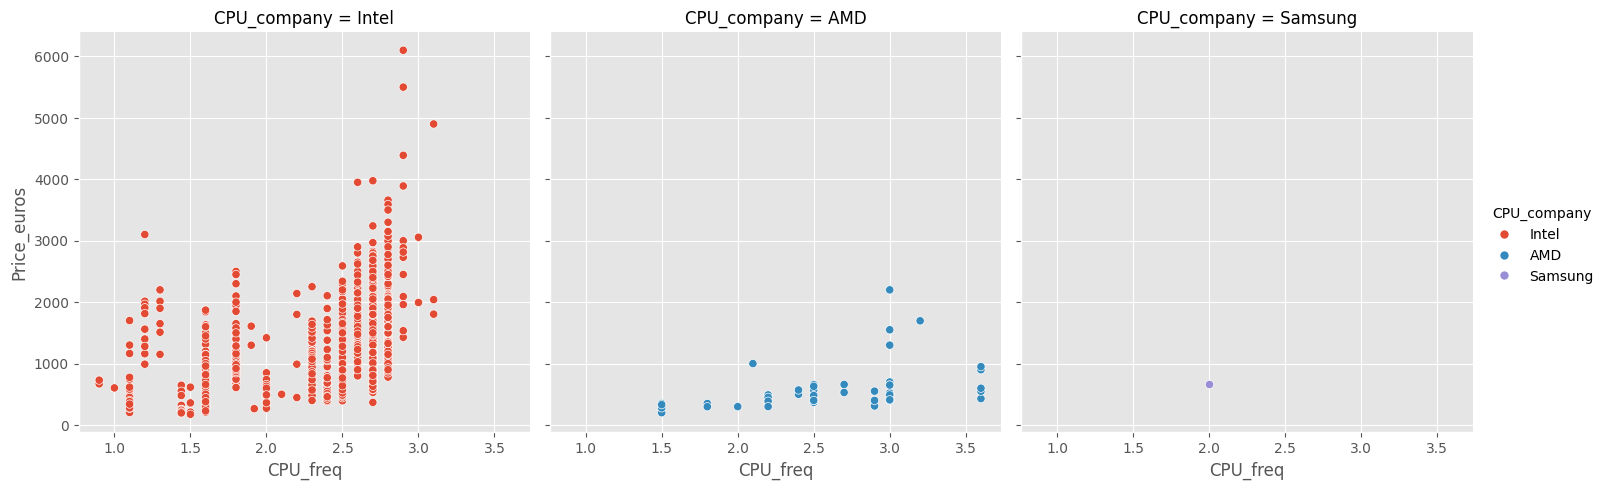

In [61]:
sns.relplot(x='CPU_freq',y='Price_euros',data=df,hue='CPU_company',col='CPU_company',col_wrap=3)

<Axes: xlabel='IPSpanel', ylabel='Price_euros'>

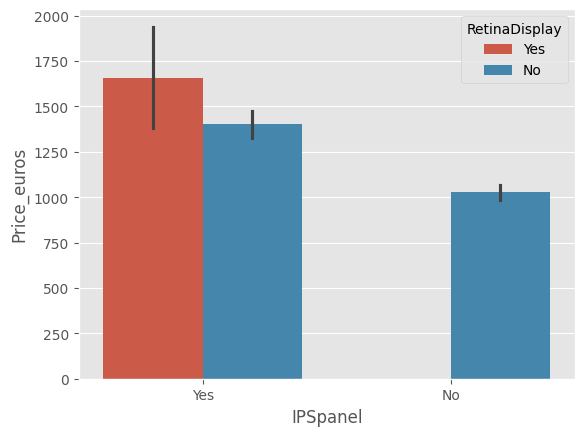

In [62]:
sns.barplot(x='IPSpanel',y='Price_euros',hue='RetinaDisplay',data=df)

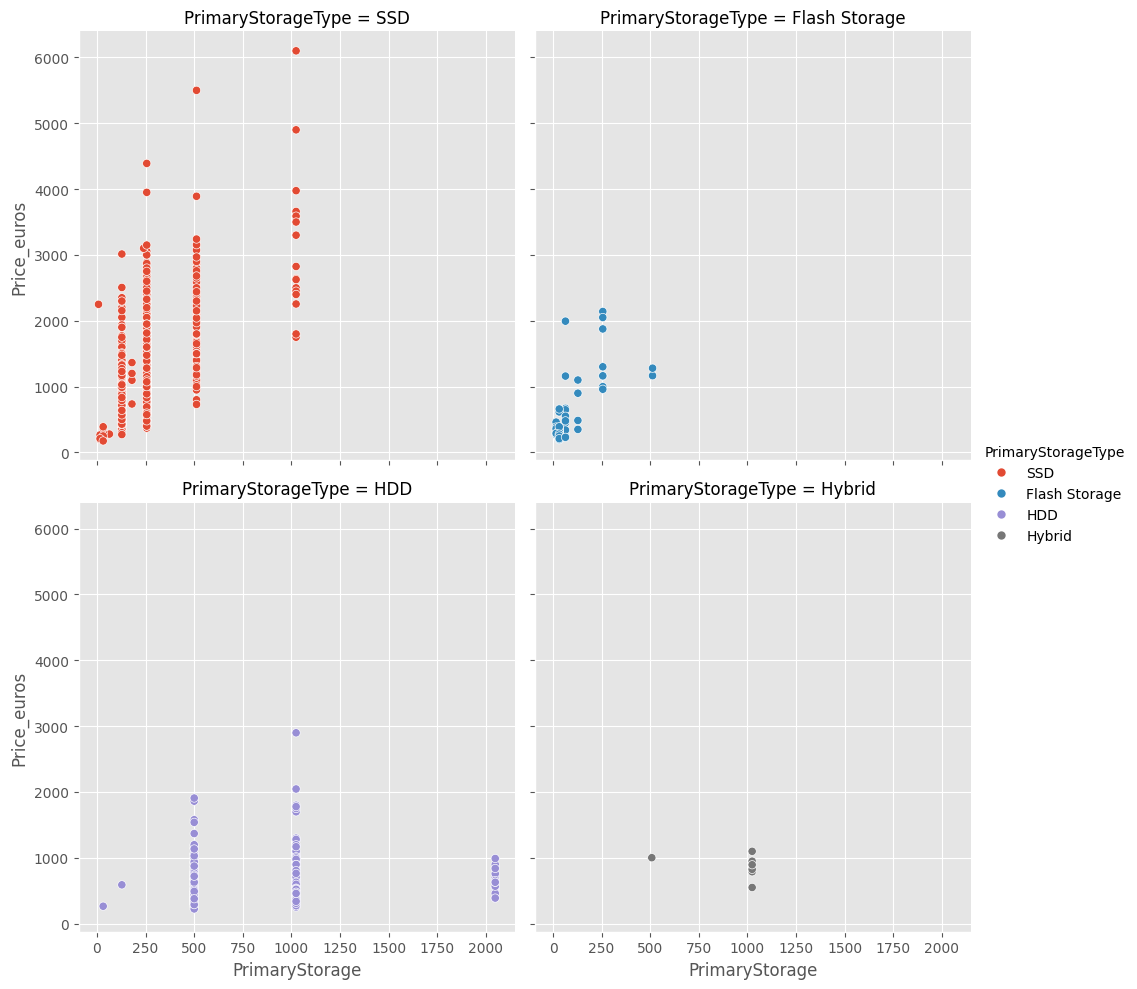

In [63]:
sns.relplot(x='PrimaryStorage',y='Price_euros',data=df,hue='PrimaryStorageType',col='PrimaryStorageType',col_wrap=2)

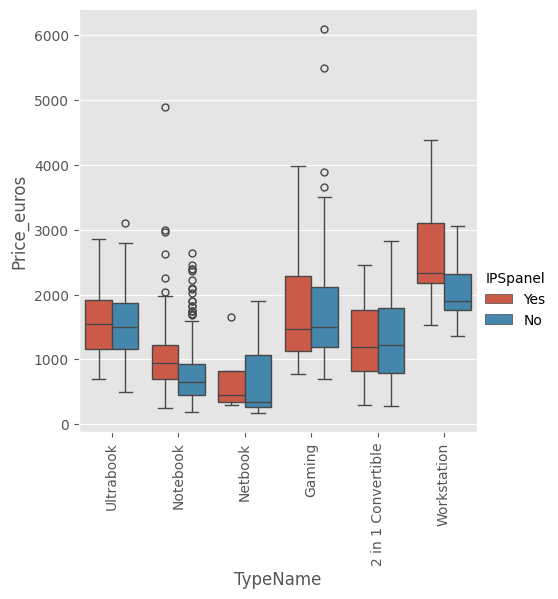

In [64]:
sns.catplot(x='TypeName',y='Price_euros',data=df,kind='box',hue='IPSpanel')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Touchscreen', ylabel='Price_euros'>

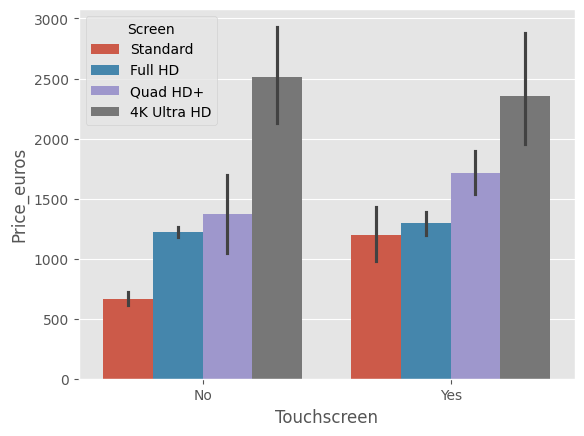

In [65]:
sns.barplot(x = df['Touchscreen'], y= df['Price_euros'] , hue = df['Screen'])

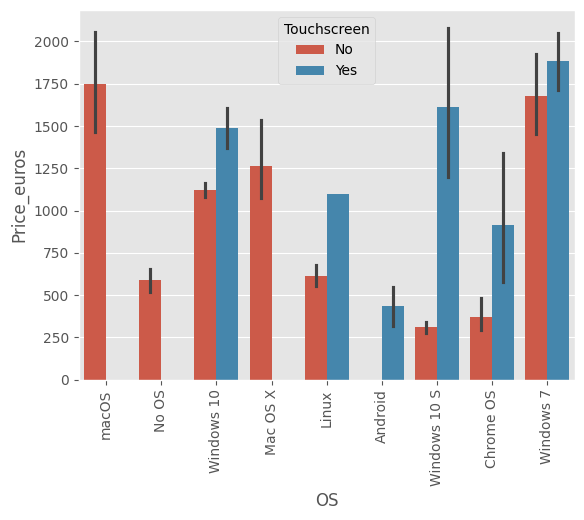

In [66]:
sns.barplot(x = df['OS'], y= df['Price_euros'] , hue = df['Touchscreen'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='RetinaDisplay', ylabel='Price_euros'>

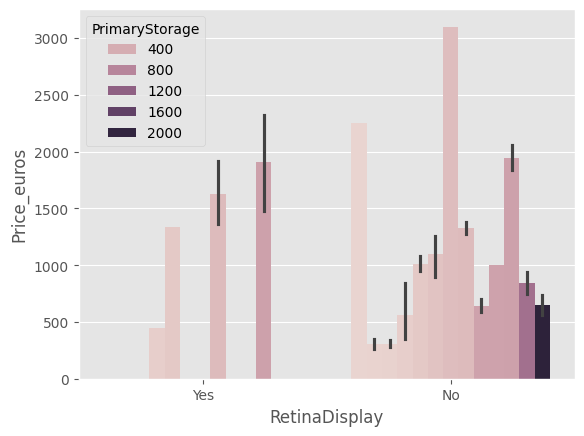

In [67]:
sns.barplot(x = df['RetinaDisplay'], y= df['Price_euros'], hue = df['PrimaryStorage'])

<Axes: xlabel='CPU_freq', ylabel='Ram'>

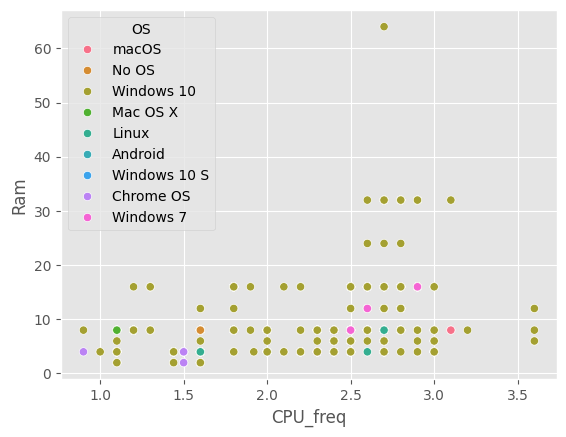

In [68]:
sns.scatterplot(x= df['CPU_freq'], y = df['Ram'], hue = df['OS'])